In [ ]:
"""
Author: Aditya Goel 400414715, MEST'21, McMaster University
SEP786: Machine Learning Fundamentals
Assignment 2 - Question 2b
References: 
1. Dr. Jeff Fortuna's SEP 786 Lecture Notes
2. https://scikit-learn.org/
"""

"\nAuthor: Aditya Goel 400414715, MEST'21, McMaster University\nSEP786: Machine Learning Fundamentals\nAssignment 2 - Question 2b\nReferences: \n1. Dr. Jeff Fortuna's SEP 786 Lecture Notes\n2. https://scikit-learn.org/\n"

**Import Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

**Initialise Mean and Cov Matrix**

In [ ]:
mean1 = np.array([-5,-4,-3,-2,-1,1,2,3,4,5])
mean2 = np.array([-10,-8,-6,-4,-2,2,4,6,8,10])
cov = np.matrix([[5,0.1,0,0,0,0,0,0,0,0], [0.1,5,0,0,0,0,0,0,0,0], [0,0,5,0,0,0,0,0,0,0], 
                  [0,0,0,5,0,0,0,0,0,0], [0,0,0,0,5,0.3,0,0,0,0], [0,0,0,0,0.3,5,0,0,0,0],
                  [0,0,0,0,0,0,5,0,0,0], [0,0,0,0,0,0,0,5,0,0], [0,0,0,0,0,0,0,0,5,0.2],
                  [0,0,0,0,0,0,0,0,0.2,5]])
print(cov)

[[5.  0.1 0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.1 5.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  5.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  5.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  5.  0.3 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.3 5.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  5.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  5.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  5.  0.2]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.2 5. ]]


**Generate Data**

In [ ]:
X1 = np.random.multivariate_normal(mean1, cov, 1000)
X2 = np.random.multivariate_normal(mean2, cov, 1000)
Xc = np.concatenate((X1,X2))
print("Shape of Xc: ", Xc.shape)

Xms1 = X1 - mean1
Xms2 = X2 - mean2
Xc1 = np.concatenate((Xms1,Xms2))

X_label = np.zeros(1000)
X_label = np.concatenate((X_label, np.ones(1000)))

Shape of Xc:  (2000, 10)


**Applying EigenValue Decomposition**

In [ ]:
D, E = np.linalg.eig(np.dot(Xc1.T,Xc1)/(Xc1.shape[0]-1))                        #Compute EVD
sortIndex = np.argsort(D)[::-1]                                                 #Reverse sort D
sortedE = E[:,sortIndex]                                                        #Sort E correspondingly

Y = np.dot(Xc,sortedE)                                                          #Obtain Transformation
print("Shape of E is: ", sortedE.shape)
print("Shape of Y is: ", Y.shape)

Shape of E is:  (10, 10)
Shape of Y is:  (2000, 10)


**PCA**

In [ ]:
def compute_score(pc):
  newE = sortedE[:,:pc]                                                         #Selecting Principal Components in a decresing way i.e. from 10 to 5
  Ynew = np.dot(Xc, newE)
  print("\nShape of E is: ", newE.shape)
  print("Shape of Y is: ", Ynew.shape)
  
  return [Ynew, newE]                                                           #Obtain Eigen-Vector submatrix E and Corresponding transformation Matrix Y

**Main Function**


Shape of E is:  (10, 10)
Shape of Y is:  (2000, 10)
Error Points:  24.0

Shape of E is:  (10, 9)
Shape of Y is:  (2000, 9)
Error Points:  25.0

Shape of E is:  (10, 8)
Shape of Y is:  (2000, 8)
Error Points:  31.0

Shape of E is:  (10, 7)
Shape of Y is:  (2000, 7)
Error Points:  36.0

Shape of E is:  (10, 6)
Shape of Y is:  (2000, 6)
Error Points:  32.0

Shape of E is:  (10, 5)
Shape of Y is:  (2000, 5)
Error Points:  35.0


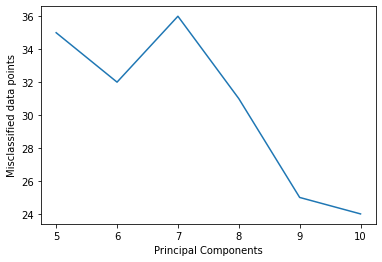

In [ ]:
error_matrix = []
pc_matrix = []

for pc in reversed(range(5,11)):
  [Ynew, newE] = compute_score(pc)
  clf = LinearDiscriminantAnalysis()
  clf.fit(Ynew, X_label)
  pred_y = clf.predict(Ynew)
  error_points = sum(abs(pred_y - X_label))
  print("Error Points: ", error_points)

  error_matrix.append(error_points)
  pc_matrix.append(pc)

plt.plot(pc_matrix, error_matrix)
plt.xlabel("Principal Components")
plt.ylabel("Misclassified data points")
plt.show()